# Introduction to Scikit learn 
Some functions of sklearn library

Flow:
0. End to end scikit learn workflow
1. get data ready
2. Choose right estimator/algorithm/model for our problem
3. Fit the estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Put it all together 

## 0 . An end to end Scikit Learn Workflow

In [1]:
import numpy as np

In [2]:
# Get the data ready
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Create X (features matrix)
X = heart_disease.drop('target',axis = 1) #copy dataframe without target column

#Create y (labels)
y = heart_disease['target'] # target column to y that is predictions

In [4]:
#2. choose the right model and hyperaparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#we'll eep the default hyperparamaters

clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
#3 Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 )

In [6]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
# make a prediction with data,,,it wil throw error because the data we
#provide is not the same size of the training model
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [9]:
y_test

49     1
134    1
292    0
83     1
69     1
      ..
44     1
91     1
100    1
284    0
62     1
Name: target, Length: 61, dtype: int64

In [10]:
# evaluate the model
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8852459016393442

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[22,  5],
       [ 2, 32]], dtype=int64)

In [14]:

accuracy_score(y_test,y_preds)

0.8852459016393442

In [15]:

#improve the model
# dry different amount of n_estimators

In [16]:
np.random.seed(42)
for i in range(10,100,10):
    print(f'trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
    print(f'Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%')
    print("")

trying model with 10 estimators
Model accuracy on test set: 78.69%

trying model with 20 estimators
Model accuracy on test set: 86.89%

trying model with 30 estimators
Model accuracy on test set: 83.61%

trying model with 40 estimators
Model accuracy on test set: 80.33%

trying model with 50 estimators
Model accuracy on test set: 85.25%

trying model with 60 estimators
Model accuracy on test set: 86.89%

trying model with 70 estimators
Model accuracy on test set: 86.89%

trying model with 80 estimators
Model accuracy on test set: 86.89%

trying model with 90 estimators
Model accuracy on test set: 86.89%



In [17]:
# sae a model and oad it
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [18]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(X_test,y_test)

0.8688524590163934

In [19]:
# get data ready for machine learning....,
# three main things to do
# 1.  split data into features and labels (X &Y)
# 2. fILLING OR DISREGARDING MISSSING VALUES
# 3. converting non numerical values to numerical values (feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target',axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# make sure its all numerical

In [25]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

#without changning to numerical see what happens

In [27]:
#split in to X & y
X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [28]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test) #will throw error so have to convert in next cells.

ValueError: could not convert string to float: 'Toyota'

In [29]:
# tur categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
#one more way to do this

dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
#lets refit the model

np.random.seed(42)
X_train,X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
model.score(X_test,y_test)

0.3235867221569877

# what if there were missing values


fill them with some values (imputations)
remove the samples with missing data altogether

In [34]:
#import car sale missing data

car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing.isna().sum() #how many missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
#lets try and convert to numbers

In [37]:
#create X & y

In [38]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']  

In [39]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [40]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# foption 1 fill missing  with pandas

In [41]:
#fill th emake column
car_sales_missing['Make'].fillna('missing',inplace= True)
car_sales_missing['Colour'].fillna('missing',inplace= True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace= True)
car_sales_missing['Doors'].fillna(4,inplace= True)

In [42]:
# check data frame again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
#remove rows with missing price values
car_sales_missing.dropna(inplace = True)

In [44]:
X = car_sales_missing.drop('Price', axis =1)
y = car_sales_missing['Price']

In [45]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# OPtion2: fill missing vaulues with scikit learn

In [46]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
#drop rows with no labels
car_sales_missing.dropna(subset=['Price'],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
#split into  X & Y
X = car_sales_missing.drop('Price',axis =1)
y = car_sales_missing['Price']

In [50]:
# fill missing values with scikit learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill caegorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value = 4)
numerical_imputer = SimpleImputer( strategy = 'mean')

#define columns

cat_features = ['Make', 'Colour']
door_features=['Doors']
numerical_features = ['Odometer (KM)']

#create an imputer (something that fills missing data
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer, cat_features),
    ('door_imputer',door_imputer,door_features),
    ('numerical_imputer', numerical_imputer,numerical_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
car_sales_filled = pd.DataFrame(filled_X, columns= ['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [52]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                               one_hot,
                               categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [54]:
#now weve got our data as numbers and filled the missing values
# so lets fita model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

the score has reduced because reviously for 30% we had 1000 samples but now we have 950 smples


# choosing the right estimator / algorithm for our problem

classification - prdicting whether a sample is one thing or another
regression predict a number'

you might wanna search sklearn ml map -> choosing the right estimator

In [55]:
# picking a machine earning model for our regreison model

In [60]:
#import data set

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
boston_df = pd.DataFrame(boston['data'],columns = boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [58]:
#lets try ridge regression model by folowing the ml map

from sklearn.linear_model import Ridge

# setyp random seed

np.random.seed(42)

X = boston_df.drop('target',axis=1)
y = boston_df['target']

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# instantiate ridge model
model = Ridge()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6662221670168522

In [59]:
# how to improve the sscore
#refer back to the map

In [60]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target',axis=1)
y = boston_df['target']

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# instantiate ridge model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

In [61]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
len(heart_disease)

303

In [63]:
# check the map


In [64]:
#consulting map it suggests try linear svc 

In [65]:
#import linear svc estimator class

In [78]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X= heart_disease.drop('target',axis = 1)
y= heart_disease['target']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=LinearSVC(max_iter=10000000)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8688524590163934

In [77]:
# failing hence move on to next option available

In [74]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target',axis = 1)
y= heart_disease['target']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

#tidbit if u hv structured data , use ensemble methods.
if you have unstructured data, use deep learning or transfer learning

# fit the model/algo on our data and use it to kae predictions

In [79]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target',axis = 1)
y= heart_disease['target']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

#fit the model to the data
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

# use a trained model to make predictions!!!
2 ways to make predictions
1 . predict()
2 . predict_proba() 

In [80]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
#compare predicions to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [84]:
clf.score(X_test,y_test)

0.8524590163934426

In [85]:
#this is what hapened

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [88]:
# make prediction with predict proba

In [89]:
#predict_proba() returns probabilities of a classification label

In [91]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [92]:
#shows probability for heart disease and no heart disease

In [94]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [1]:
#evaluating a model using scoring parameter

In [26]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease = pd.read_csv('heart-disease.csv')

X= heart_disease.drop('target',axis = 1)
y= heart_disease['target']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

#fit the model to the data
clf.fit(X_train,y_train);


In [6]:
clf.score(X_test,y_test)

0.8524590163934426

In [8]:
cross_val_score(clf,X,y, scoring =None)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

#go to video for better understanding however it does 5 times split of data in to train and test data and train the model

#trains the model better

#classification model evaluation metrics

1. accuacy
2. area under roc curve
3. confusion matrix
4. classification report

In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv('heart-disease.csv')
np.random.seed(2)

X= heart_disease.drop('target',axis =1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [9]:
np.mean(cross_val_score)

0.8215846994535518

In [12]:
print(f'heart disease classifier accuracy: {np.mean(cross_val_score)*100:.2f}')

heart disease classifier accuracy: 82.16


In [27]:
from joblib import dump,load
 
#save model to file
dump(clf , filename= 'random_forest_model_1.joblib')

['random_forest_model_1.joblib']

In [18]:
#import joblib model

In [28]:
loaded_job_model = load(filename = 'random_forest_model_1.joblib')

In [20]:
#make and valuate joblib predictions

In [31]:
joblib_preds = loaded_job_model.predict(X_test)
joblib_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## area under receiver operating characteristic curve (auc/roc)

roc curves are a comparison of a models true versus false positive rate

* true positive = model predicts 1 when real is also 1
* false positive = model predicts 1 when real is 0
* true negative = model predicts 0 when real is also 0
* false negative = model predicts 0 when real is 1

In [33]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)

In [34]:
 y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [35]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [36]:
#calculate fpr, tpr, thresholds

fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [37]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [38]:
# create a func to plot ROC curves

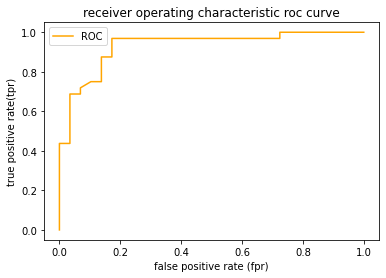

In [42]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    PLots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # plot roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    #plot ine with no predicitve power (baseline)
    #plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label ='guessing')
    
    plt.xlabel('false positive rate (fpr)')
    plt.ylabel('true positive rate(tpr)')
    plt.title('receiver operating characteristic roc curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

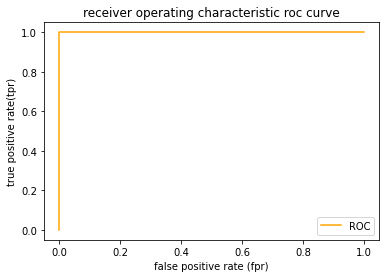

In [45]:
#plot perfect ROC curve and auc score

fpr,tpr,thesholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [46]:
roc_auc_score(y_test,y_test)

1.0

#perfect model :P


* confusion matrix
a con matrix is a quick way to compare the lebels a model predicts and the actual labels it was supposed to predict
in essence giving you an idea of where the model is getting confused

In [48]:
from sklearn.metrics import confusion_matrix

y_preds  = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [49]:
#visualize con mat with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['actual label'], colnames=['predictive labels'])

predictive labels,0,1
actual label,,
0,24,5
1,4,28


In [50]:
# install new package through jupyterif not found,, ! - >bash command
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Faizan\Desktop\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         125 KB
    openssl-1.1.1g             |       he774522_1         4.8 MB
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0

The following packages will be UPDATED:

  ca-certificates                               2020.6.24-0 --> 2020.7.22-0
  openssl                                 1.1.1g-he774522_0 --> 1.1.1g-he774522_1




seaborn-0.10.1       | 163 KB    |            |

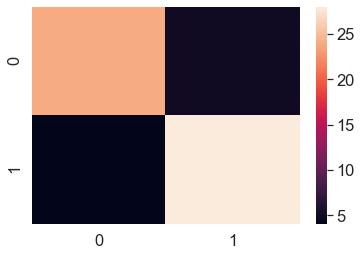

In [51]:
import seaborn as sns

sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

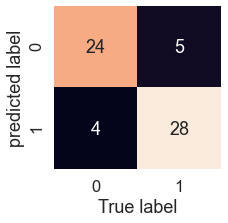

In [52]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using seaorns heat map().
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,annot = True,
                    cbar = False)
    plt.xlabel('True label')
    plt.ylabel('predicted label');
plot_conf_mat(conf_mat)

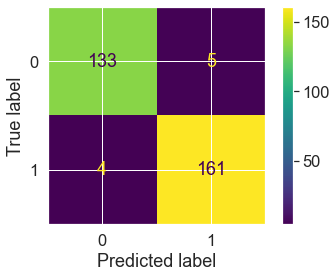

In [54]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,y)

* classification report

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [57]:
# where precision and recal become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #ony one positive case

disease_preds =np.zeros(10000) #model predicts every case 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# regression model evaluatio metrics

R^2 Rsquared coefficient of determination
MAE mean absolute errror
MSE mean square error

r^2 compares your models prediction to the mean of the target values can range from negative infiniity to 1


In [64]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target',axis =1)
y= boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_test,y_test);


In [65]:
model.score(X_test,y_test)

0.973626149745228

In [68]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test),y_test.mean())

In [69]:
y_test.mean()


21.488235294117644

In [71]:
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [72]:
r2_score(y_test,y_test_mean)

0.0

In [73]:
r2_score(y_test,y_test)


1.0

**MAE**

In [75]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae


0.8725686274509816

In [77]:
df = pd.DataFrame(data={'actual values':y_test,
                       'predicted values':y_preds})
df

,actual values,predicted values
173,23.6,23.896
274,32.4,31.849
491,13.6,14.008
72,22.8,22.976
452,16.1,15.864
...,...,...
412,17.9,15.509
436,9.6,11.541
411,17.2,16.613
86,22.5,21.877


** mean squared error

In [78]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

1.9340942156862755

## using scorig arameter

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop('target',axis =1 )
y= heart_disease['target']

clf = RandomForestClassifier()


In [82]:
cv_acc = cross_val_score(clf,X,y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [83]:
print(f'the cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is: 82.48%


In [85]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,scoring = 'accuracy')
print(f'the cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is: 82.48%


In [86]:
cv_precision = cross_val_score(clf,X,y,scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [90]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8484848484848484

In [91]:
cv_f1 = cross_val_score(clf,X,y,scoring='f1')
np.mean(cv_f1)

0.8455032904593217

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target',axis = 1)

y= boston['target']

model = RandomForestRegressor()

In [98]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,scoring = None) #none and r2 are default

In [97]:
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [100]:
np.random.seed(42)

cv_mae = cross_val_score(model,X,y,scoring = 'neg_mean_absolute_error')
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [101]:
cv_mse = cross_val_score(model,X,y,scoring = 'neg_mean_squared_error')
cv_mse

array([ -7.97480422, -12.28179177, -22.18600986, -46.86720385,
       -18.37011596])

In [102]:
np.mean(cv_mse)

-21.535985132246157

In [103]:
np.mean(cv_mae)

-3.0312352552902335

# using diff evaluation metrics as scikit learn

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
y =heart_disease['target']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)
print('clasifier metrics on the test set')
print(f'Accuracy :{accuracy_score(y_test,y_preds)*100:.2f}%')
print(f'Precision : {precision_score(y_test,y_preds)}')
print(f'Recall: {recall_score(y_test,y_preds)}')
print(f'f1 :{f1_score(y_test,y_preds)}')

clasifier metrics on the test set
Accuracy :85.25%
Precision : 0.8484848484848485
Recall: 0.875
f1 :0.8615384615384615


**Regression evaluation functions**

In [112]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X= boston_df.drop('target',axis= 1)
y= boston_df['target']

model = RandomForestRegressor()
model.fit(X_train,y_train)

model.predict(X_test)

print('regression model metrics on the test set')
print(f'r^2 : {r2_score(y_test,y_preds)}')

regression model metrics on the test set
r^2 : 0.40840517241379315


# improving a model

#first predictions = baseline predictions
#first mode = baseline model

* could we collect data?
* could we improve our data

model perspective
* is there a better model?
* could we improve the current model


### tuning hyper parameters by hand

In [114]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [122]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison y_true vs y_pred labels
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  'precision':round(precision,2),
                  'recall':round(recall,2),
                  'f1':round(f1,2)}
    print(f'acc:{accuracy*100:.2f}%')
    print(f'precision:{precision:.2f}')
    print(f'recall: {recall:.2f}')
    print(f'f1 score: {f1:.2f}')
    return metric_dict
    

In [123]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heart_disease_shuffled  = heart_disease.sample(frac=1)
#split into x and y

X = heart_disease_shuffled.drop('target',axis =1)
y = heart_disease_shuffled['target']

train_split = round(0.7*len(heart_disease_shuffled))
valid_split = round(train_split +0.15 *len(heart_disease_shuffled))
X_train,y_train = X[:train_split], y[:train_split]
X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test =X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

acc:82.22%
precision:0.81
recall: 0.88
f1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [127]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train,y_train)
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

acc:82.22%
precision:0.81
recall: 0.88
f1 score: 0.85


In [128]:
clf_3 = RandomForestClassifier(max_depth=10)
clf_3.fit(X_train,y_train)
y_preds_3 = clf_3.predict(X_valid)
clf_3_metrics = evaluate_preds(y_valid,y_preds_3)

acc:86.67%
precision:0.85
recall: 0.92
f1 score: 0.88


# hyperparameter tuning with randomized search cv

In [129]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
       'max_depth':[None,5,10,20,30],
       'max_features':['auto','sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}
np.random.seed(42)

X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier(n_jobs =1)# njobs-> processor dedicating to it


rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                           cv=5,
                           verbose=2)

#fit randomized search cv version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.2s finished


In [130]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

# awesome

In [131]:
#make predictions with best hyperparameters

In [132]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)


acc:81.97%
precision:0.77
recall: 0.86
f1 score: 0.81


 # pipeline

In [2]:
import pandas as pd
data = pd.read_csv("9.2 car-sales-missing-data.csv")

In [3]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

Steps we want to do:
1. fill missing data
2. convert data to numbers
3. buid a model on the data


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

import numpy as np
np.random.seed(42)

data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset = ['Price'],inplace = True)

#define different features and transform pipeline

categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
     ('onehot',OneHotEncoder(handle_unknown='ignore'))]  )
door_feature = ['Doors']
door_transformer= Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean'))
])

preprocessor =ColumnTransformer(
                    transformers = [
                        ('cat',categorical_transformer,categorical_features),
                        ('door',door_transformer,door_feature),
                        ('num',numeric_transformer,numeric_features)
                    ])

model = Pipeline(steps=[('preprocessor',preprocessor),
                      ('model', RandomForestRegressor())])

X = data.drop('Price',axis = 1)
y = data['Price']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

its also possibl to use grid search or randomized search cv with our pipeline

In [10]:
#use gridsearchcv with our regression pipeline
pipe_grid = {
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000], 
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]
}

gs_model =GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.4s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.3s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.9s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [11]:
gs_model.score(X_test,y_test )

0.3339554263158365